In [1]:
import pickle
import os
import torch
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns

In [15]:
filename = "/home/ubuntu/Desktop/CVPR 2022 AliProducts Challenge/code/model/BLIP/blip_train_features_noisy_32_0.pkl"
all_features_1 = torch.load(filename)

filename = "/home/ubuntu/Desktop/CVPR 2022 AliProducts Challenge/code/model/BLIP/blip_train_features_noisy_32_1.pkl"
all_features_2 = torch.load(filename)

filename = "/home/ubuntu/Desktop/CVPR 2022 AliProducts Challenge/code/model/BLIP/blip_train_features_noisy_32_2.pkl"
all_features_3 = torch.load(filename)

filename = "/home/ubuntu/Desktop/CVPR 2022 AliProducts Challenge/code/model/BLIP/blip_train_features_noisy_32_3.pkl"
all_features_4 = torch.load(filename)


In [16]:
all_features = all_features_1+all_features_2+all_features_3+all_features_4

In [17]:
full_pred = tuple(map(torch.concat, zip(*all_features)))
image_embed,text_embed=full_pred

In [18]:
single_pair_cosine = np.array(list((txt @ img.T).item() for txt ,img in tqdm(zip(text_embed,image_embed))))

0it [00:00, ?it/s]

In [27]:
len(single_pair_cosine)

123340

In [21]:
single_pair_cosine.max()

0.49691689014434814

In [22]:
single_pair_cosine.min()

0.11973075568675995

In [23]:
single_pair_cosine.mean()

0.384069058965473

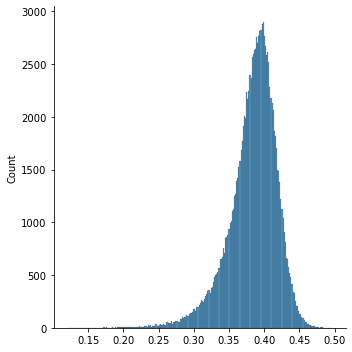

In [26]:
sns.displot(single_pair_cosine)

In [ ]:
filename = "all_single_pair_cosine_score_train_v5.pkl"
file = open(filename,"wb")
pickle.dump(single_pair_cosine,file)
file.close()